In [1]:
import tensorflow as tf
import os
import random as r
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd

In [2]:
train_path = "Dataset\\train"
test_path = "Dataset\\test"
valid_path = "Dataset\\valid"

In [3]:
files = []
label = []

for filenames in os.listdir(train_path):
    dirname = os.path.join(train_path, filenames)
    for filename in os.listdir(dirname):
        files.append(os.path.join(dirname, filename))
        dog_name = dirname.split("\\")[2]
        if dog_name not in label:
            label.append(dog_name)

In [4]:
r.shuffle(files)

In [5]:
files[1].split("\\")[2]

'Pomeranian'

In [6]:
label[1]

'African Wild Dog'

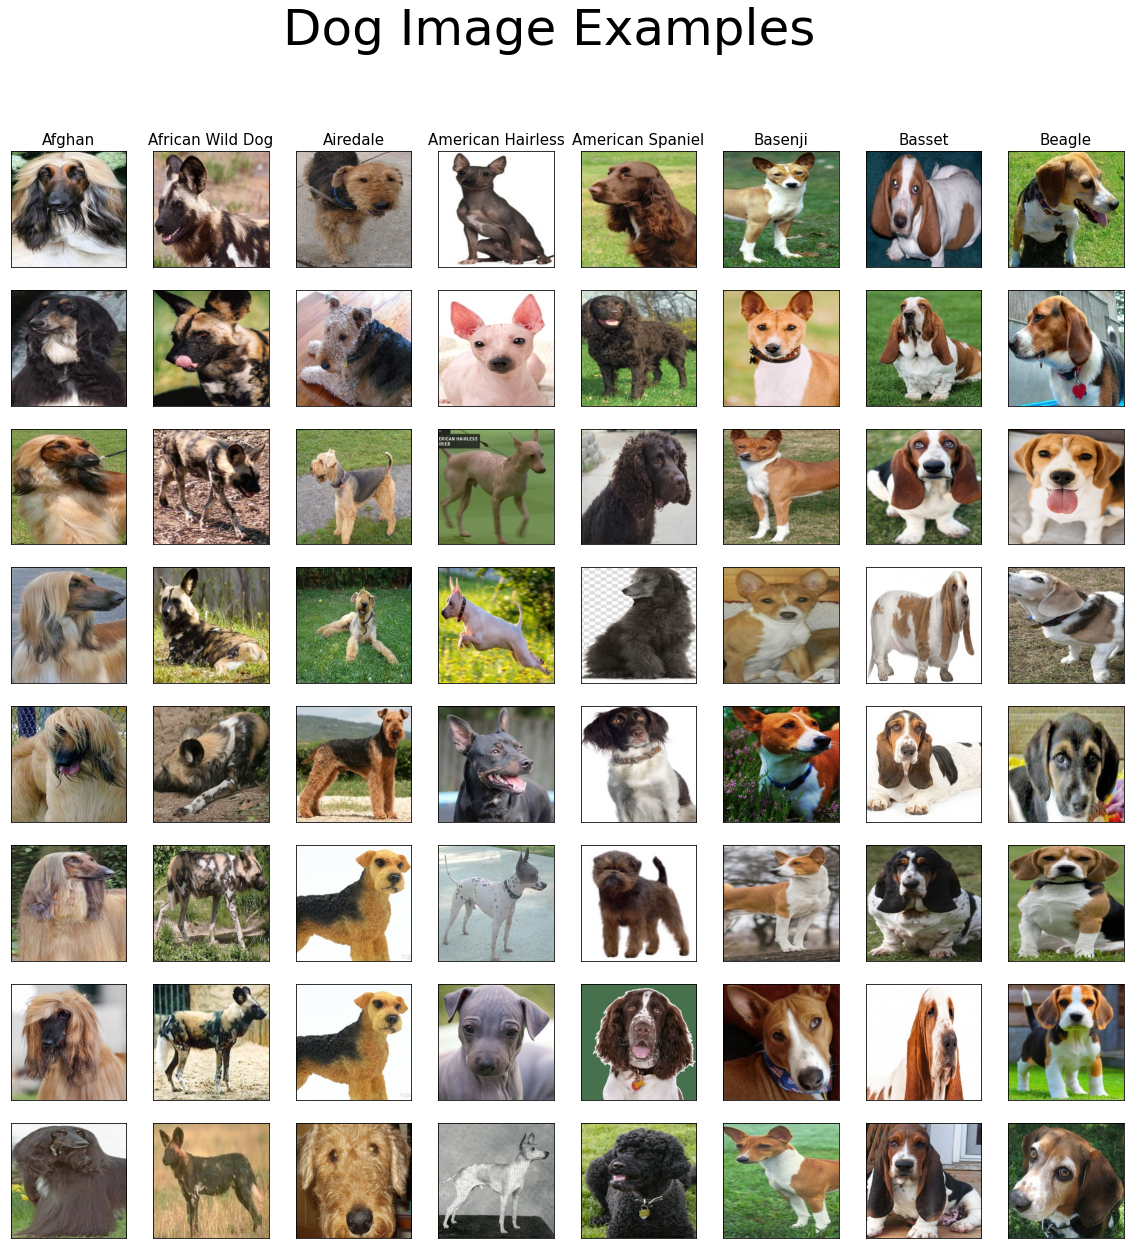

In [7]:
f, axarr = plt.subplots(8,8,figsize=(20,20))

f.suptitle('Dog Image Examples', fontsize=50)

row = 0
dog_img = 0
done = []

for col in range(8):
    while(1):
        if label[col] == files[dog_img].split("\\")[2] and label[col] not in done:
            axarr[row,col].imshow(plt.imread(files[dog_img]))
            axarr[0,col].set_title(label[col], fontsize=15)
            axarr[row,col].set_xticks([])
            axarr[row,col].set_yticks([])
            row += 1
        if row == 8:
            row = 0
            done.append(label[col])
            break
        dog_img += 1

In [8]:
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 target_size=(224,224), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory=valid_path,
                                                 shuffle=True,
                                                 target_size=(224,224), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 6390 images belonging to 70 classes.
Found 140 images belonging to 70 classes.


In [9]:
IMG_SHAPE = (224,224,3)
base_model = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE,
                                               include_top=False, 
                                               weights='imagenet')

base_model.trainable = False

In [10]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(70, activation='softmax')
])
model._name = "Doggies"

In [11]:
model.summary()

Model: "Doggies"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 dropout (Dropout)           (None, 5, 5, 2048)        0         
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 70)                143430    
                                                                 
Total params: 21,946,214
Trainable params: 143,430
Non-trainable params: 21,802,784
_________________________________________________________________


In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), #Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [13]:
# from keras.callbacks import CSVLogger
# os.makedirs('saved_model', exist_ok=True)

# csv_logger = CSVLogger('saved_model/training.log', separator=',', append=False)
# model.fit(
#     train_dataset,
#     epochs=50,
#     validation_data = validation_dataset,
#     callbacks=[csv_logger]
# )
# model.save('saved_model/Doggie_model')
# hist = pd.read_csv('saved_model/training.log', sep=',', engine='python')

In [14]:
model = tf.keras.models.load_model('saved_model/Doggie_model')
hist = pd.read_csv('saved_model/training.log', sep=',', engine='python')

In [15]:
hist

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.502191,2.562600,0.878571,1.147031
1,1,0.888106,0.694231,0.892857,0.627901
2,2,0.912833,0.408451,0.914286,0.520764
3,3,0.920970,0.318476,0.914286,0.499128
4,4,0.926135,0.272781,0.921429,0.475724
5,5,0.935837,0.241857,0.921429,0.468183
6,6,0.937559,0.219858,0.928571,0.455993
7,7,0.942723,0.201287,0.935714,0.457821
8,8,0.947105,0.186761,0.921429,0.445249
9,9,0.950391,0.173832,0.935714,0.446454


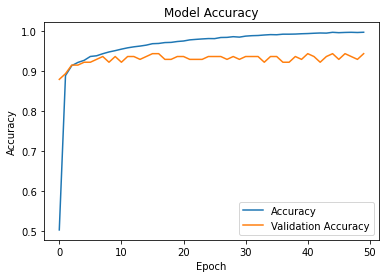

In [16]:
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

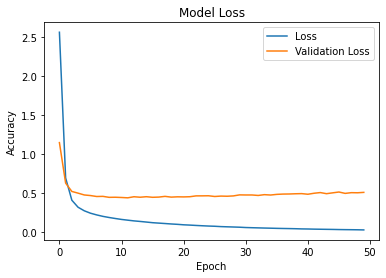

In [17]:
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("Model Loss")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()

In [18]:
def pred_funs(address):
    image = tf.keras.preprocessing.image.load_img(address, target_size=(224, 224))
    img = np.array(image)
    img = img / 255.0
    img = img.reshape(1,224,224,3)
    result = np.argmax(model.predict(img))
    return label[result]

In [19]:
files = []
label = []

for filenames in os.listdir(test_path):
    dirname = os.path.join(test_path, filenames)
    for filename in os.listdir(dirname):
        files.append(os.path.join(dirname, filename))
        dog_name = dirname.split("\\")[2]
        if dog_name not in label:
            label.append(dog_name)

In [19]:
r.shuffle(files)
label.sort()

In [20]:
def add_headers(
    fig,
    *,
    row_headers=None,
    col_headers=None,
    row_pad=1,
    col_pad=5,
    rotate_row_headers=True,
    **text_kwargs
):
    # Based on https://stackoverflow.com/a/25814386

    axes = fig.get_axes()

    for ax in axes:
        sbs = ax.get_subplotspec()

        # Putting headers on cols
        if (col_headers is not None) and sbs.is_first_row():
            ax.annotate(
                col_headers[sbs.colspan.start],
                xy=(0.5, 1),
                xytext=(0, col_pad),
                xycoords="axes fraction",
                textcoords="offset points",
                ha="center",
                va="baseline",
                **text_kwargs,
            )

        # Putting headers on rows
        if (row_headers is not None) and sbs.is_first_col():
            ax.annotate(
                row_headers[sbs.rowspan.start],
                xy=(0, 0.5),
                xytext=(-ax.yaxis.labelpad - row_pad, 0),
                xycoords=ax.yaxis.label,
                textcoords="offset points",
                ha="right",
                va="center",
                rotation=rotate_row_headers * 90,
                **text_kwargs,
            )

font_kwargs = dict(fontfamily="monospace", fontweight="bold", fontsize=50)

1/1 [==============================] - 0s 123ms/step


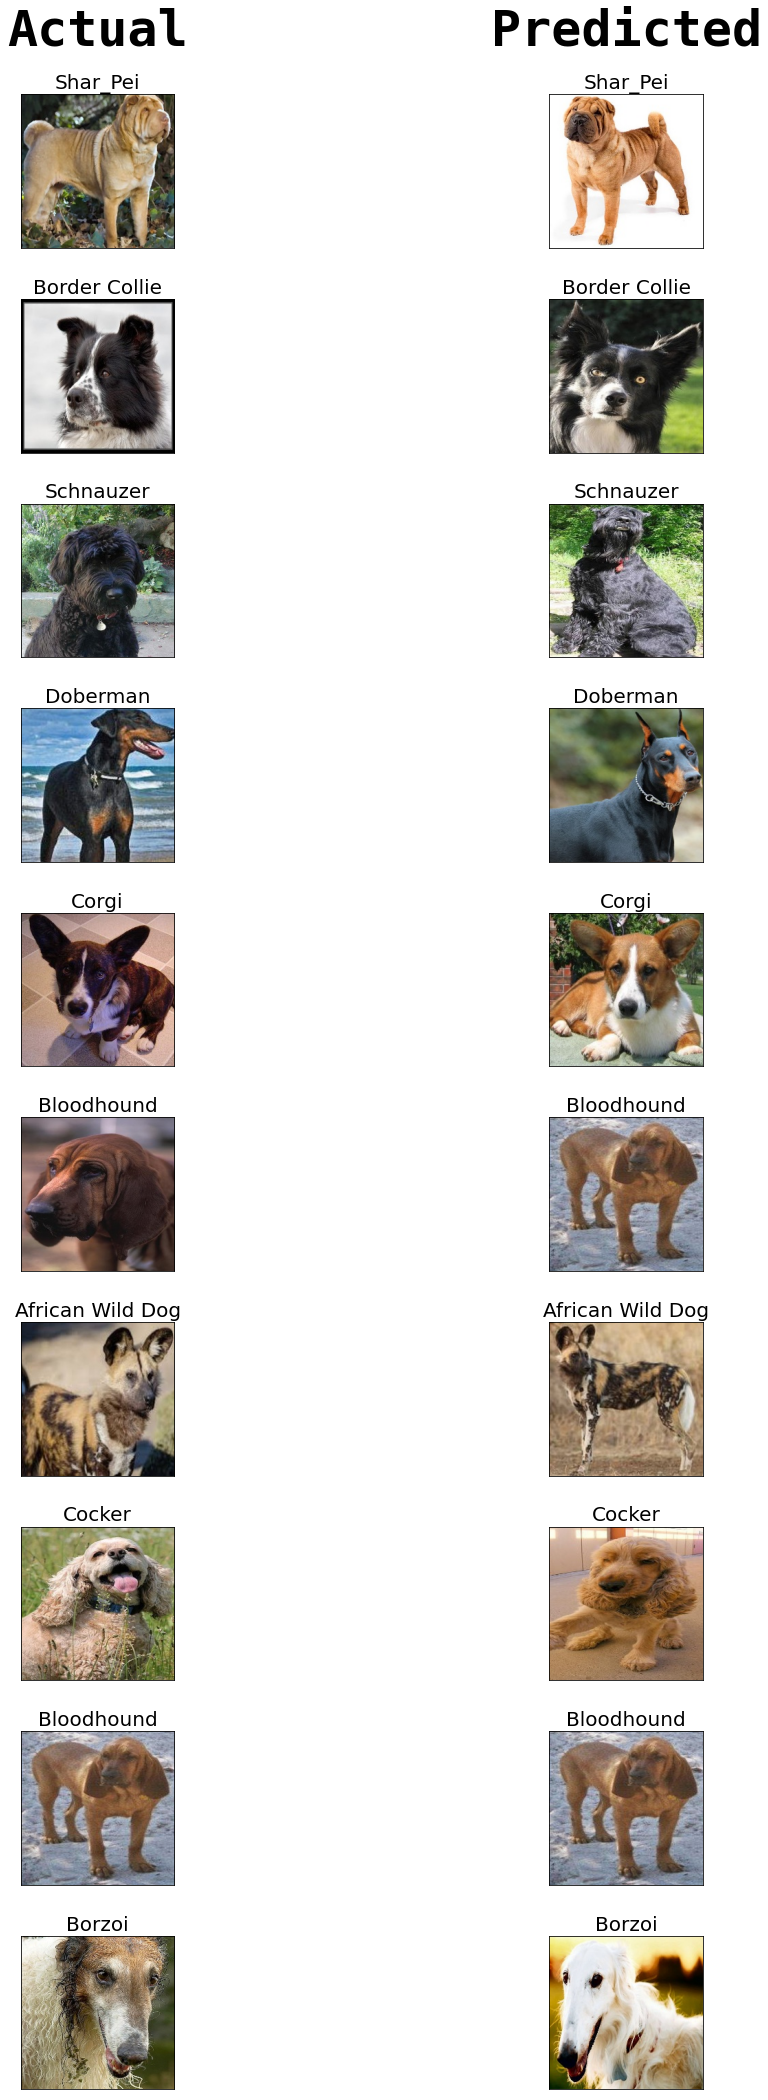

In [30]:
r.shuffle(files)
label.sort()

col_headers = ["Actual", "Predicted"]

f, axarr = plt.subplots(10,2,figsize=(30,30))

add_headers(f, col_headers=col_headers, **font_kwargs, col_pad=50)
f.tight_layout(pad=3)
plt.subplots_adjust(right=0.5)

for row in range(10):
    count = 0
    check = True
    actual = files[row].split("\\")[2]
    predicted = pred_funs(files[row])
    
    axarr[row,0].imshow(plt.imread(files[row]))    
    axarr[row,0].set_title(actual, fontsize=20)
    axarr[row,0].set_xticks([])
    axarr[row,0].set_yticks([])

    while(True):
        if predicted == files[count].split("\\")[2]:
            if check:
                check = False
                count += 1
                continue
            axarr[row,1].imshow(plt.imread(files[count]))
            axarr[row,1].set_title(str(predicted), fontsize=20)
            axarr[row,1].set_xticks([])
            axarr[row,1].set_yticks([])
            break
        else:
            count += 1
            